<a href="https://colab.research.google.com/github/nlakshmisoundarya/MY-PRACTICES/blob/main/TaxiRide_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas

In [ ]:
import os
import pandas as pd
import pyarrow.parquet as pq

years = [2010]
months = [str(month).zfill(2) for month in range(1, 13)]
colours = 'yellow'
dfs = []

for colour in colours:
    for year in years:
        for month in months:
            file_path = f"/content/drive/MyDrive/project2/NYC - Data Set/yellow_tripdata_2010-{month}.parquet"
            if os.path.exists(file_path):
                try:
                    table = pq.read_table(file_path)
                    df = table.to_pandas()
                    df = df.head(1000)
                    df.drop_duplicates(inplace=True)
                    df.dropna(inplace=True)
                    dfs.append(df)
                    if len(dfs) == 12:
                        break
                except pa.ArrowInvalid:
                    print(f"Skipping file {file_path} due to timestamp conversion error")

    if len(dfs) == 12:
        break

combined_df = pd.concat(dfs)
combined_df.to_csv("cleaned_data.csv", index=False)


In [ ]:
combined_df['pickup_datetime'] = pd.to_datetime(combined_df['pickup_datetime'])

combined_df['month'] = combined_df['pickup_datetime'].dt.month

avg_fare_per_month = combined_df.groupby('month')['fare_amount'].mean()

print(avg_fare_per_month)

month
1      9.011930
2      9.201200
3     10.303500
4      9.402857
5      9.838757
6     10.435294
7     10.283708
8      9.453668
9     10.587705
10     9.877733
11    10.746635
12     9.932381
Name: fare_amount, dtype: float64


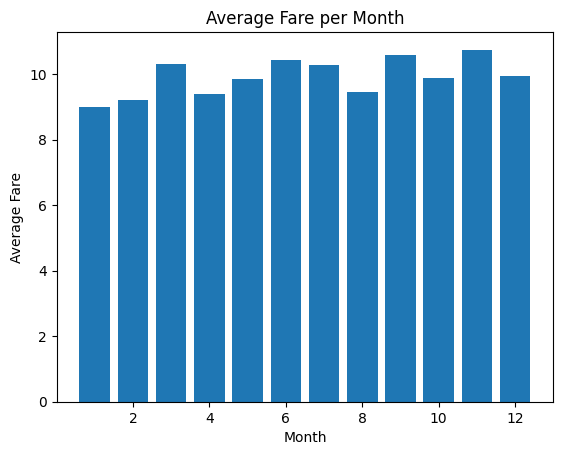

In [ ]:
import matplotlib.pyplot as plt

plt.bar(avg_fare_per_month.index, avg_fare_per_month.values)

plt.xlabel('Month')
plt.ylabel('Average Fare')
plt.title('Average Fare per Month')

plt.show()

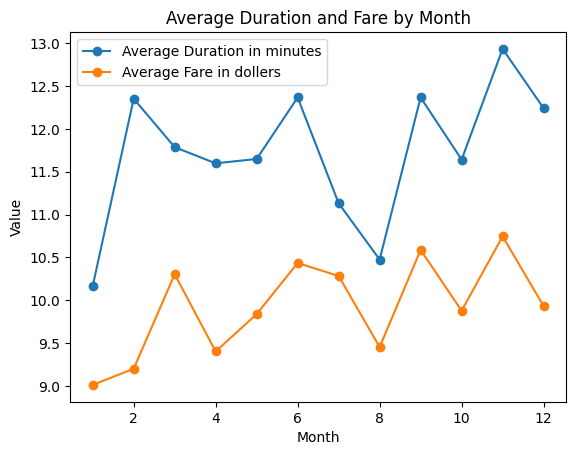

In [ ]:

combined_df['dropoff_datetime'] = pd.to_datetime(combined_df['dropoff_datetime'])

combined_df['duration'] = (combined_df['dropoff_datetime'] - combined_df['pickup_datetime']).dt.total_seconds() / 60

monthly_stats = combined_df.groupby(combined_df['pickup_datetime'].dt.month).agg({
    'duration': 'mean',
    'fare_amount': 'mean'
}).reset_index()
plt.plot(monthly_stats['pickup_datetime'], monthly_stats['duration'], marker='o', label='Average Duration in minutes')
plt.plot(monthly_stats['pickup_datetime'], monthly_stats['fare_amount'], marker='o', label='Average Fare in dollers')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Average Duration and Fare by Month')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("cleaned_data.csv")

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

df = df[(df['pickup_latitude'] != 0.0) & (df['pickup_longitude'] != 0.0) &
        (df['dropoff_latitude'] != 0.0) & (df['dropoff_longitude'] != 0.0)]
top_pickup_times = df['pickup_datetime'].value_counts().nlargest(10)
top_pickup_ranges = df.groupby(['pickup_longitude', 'pickup_latitude']).size().nlargest(10)
top_dropoff_ranges = df.groupby(['dropoff_longitude', 'dropoff_latitude']).size().nlargest(10)
top_pickup_ranges = top_pickup_ranges.reset_index()
top_dropoff_ranges = top_dropoff_ranges.reset_index()
results_df = pd.DataFrame({
    'Top 10 Frequent Pickup Times': top_pickup_times.index,
    'Pickup Count': top_pickup_times.values,
    'Top 10 Frequent Pickup Ranges (Longitude)': top_pickup_ranges['pickup_longitude'].values,
    'Top 10 Frequent Pickup Ranges (Latitude)': top_pickup_ranges['pickup_latitude'].values,
    'Pickup Count (Ranges)': top_pickup_ranges[0].values,
    'Top 10 Frequent Dropoff Ranges (Longitude)': top_dropoff_ranges['dropoff_longitude'].values,
    'Top 10 Frequent Dropoff Ranges (Latitude)': top_dropoff_ranges['dropoff_latitude'].values,
    'Dropoff Count (Ranges)': top_dropoff_ranges[0].values,
})
results_df.to_csv("pickup_dropoff_analysis.csv", index=False)


day_of_week  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
hour                                                                       
0                 5       21         27        22     117        43      73
1                 7        5         20        11      67        30      75
2                 6        9         14         7     191        41      43
3                 5        2         10         5      32        40      24
4                 2        5          3         2      33        23      17
5                 4        2         12         8      22         9      11
6                 9        8         13        14      26         7      17
7                21       14         18        36      66        17      16
8                27       22         13        31      90        29      16
9                19       26         19        61      46        38      44
10               25       13         15        24     146        30      51
11          

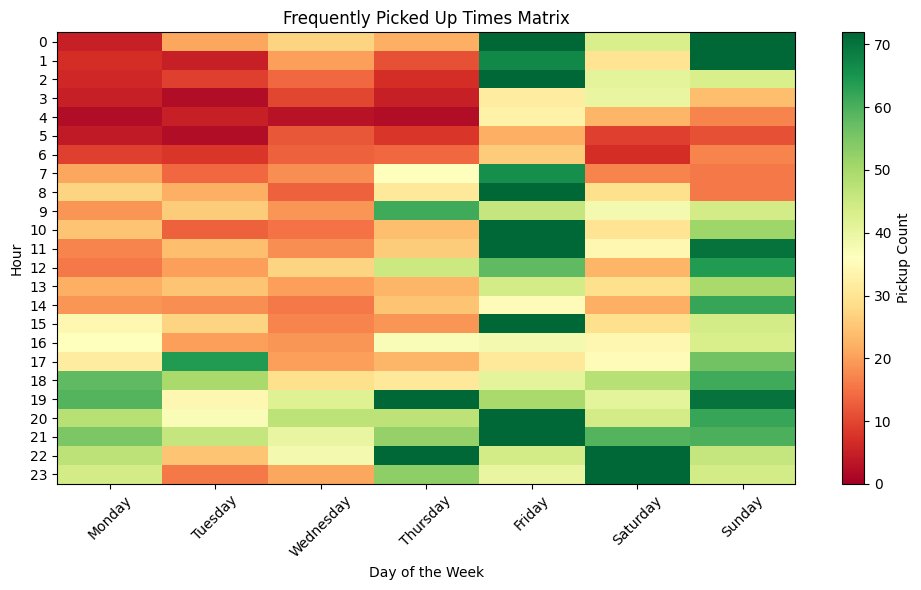

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
pickup_matrix = df.pivot_table(index='hour', columns='day_of_week', values='fare_amount', aggfunc='count')
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pickup_matrix = pickup_matrix.reindex(columns=weekday_order)
print(pickup_matrix)
average_count = pickup_matrix.mean().mean()
plt.figure(figsize=(10, 6))
plt.imshow(pickup_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=2 * average_count)
plt.colorbar(label='Pickup Count')
plt.title('Frequently Picked Up Times Matrix')
plt.xlabel('Day of the Week')
plt.ylabel('Hour')
plt.xticks(range(len(weekday_order)), weekday_order, rotation=45)
plt.yticks(range(24))
plt.tight_layout()
plt.show()


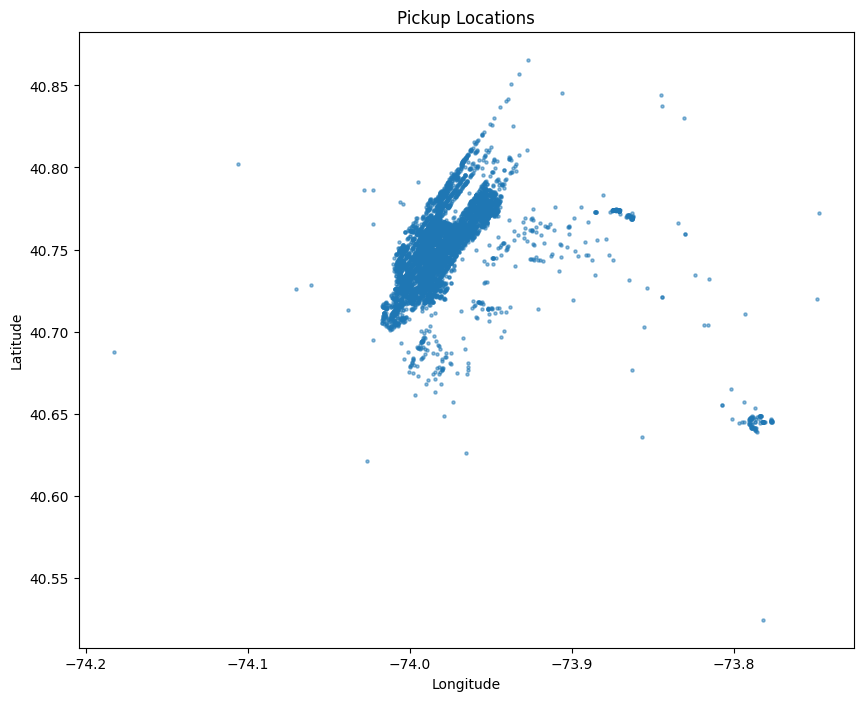

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(df["pickup_longitude"], df["pickup_latitude"], s=5, alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Pickup Locations")
plt.show()

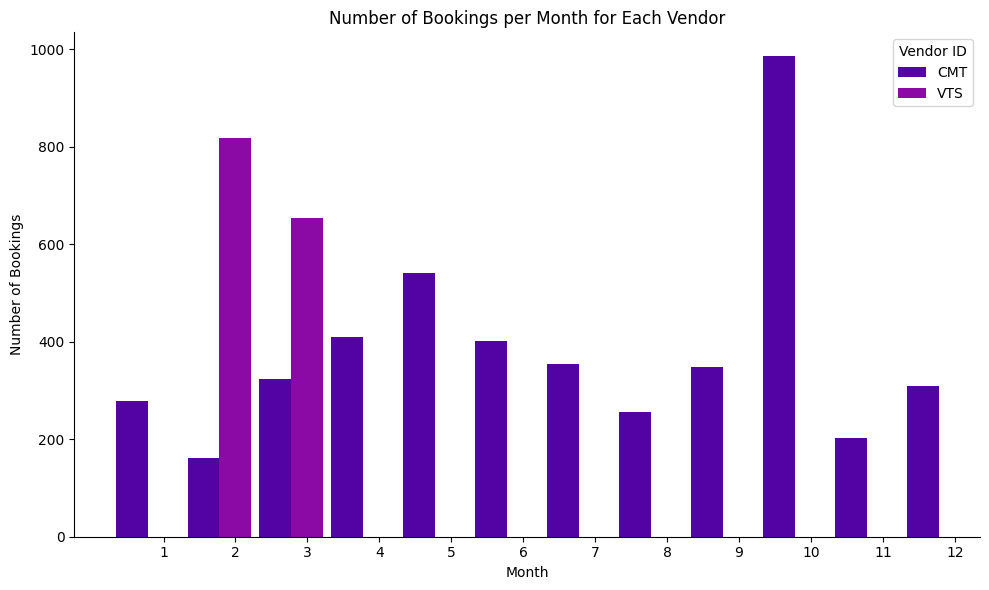

In [ ]:
import seaborn as sns

df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["pickup_month"] = df["pickup_datetime"].dt.month
bookings_per_month = df.groupby(["vendor_id", "pickup_month"]).size().unstack()
sns.set_palette("plasma")
width = 0.4
gap = 0.1
num_vendors = len(bookings_per_month.index)
num_months = len(bookings_per_month.columns)
total_width = width * num_vendors
group_distance = total_width + gap
x = np.arange(num_months) * group_distance

# Plot the bars for each vendor
fig, ax = plt.subplots(figsize=(10, 6))
for i, vendor in enumerate(bookings_per_month.index):
    ax.bar(x + i * width, bookings_per_month.loc[vendor], width=width, label=vendor)
ax.set_xticks(x + total_width / 2)
ax.set_xticklabels(bookings_per_month.columns)
ax.set_xlabel("Month")
ax.set_ylabel("Number of Bookings")
ax.set_title("Number of Bookings per Month for Each Vendor")
ax.legend(title="Vendor ID", loc="upper right")
sns.despine()

plt.tight_layout()
plt.show()

